In [1]:
#PURE PYTHON!!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re

In [2]:
path = %pwd
path += '/fifa-18-demo-player-dataset/CompleteDataset.csv'

In [3]:
def clean_raw_data(path=None):
    """
    Denne metode fjerner uønskede kolonner samt indsætter 0 på målmændendes ikke-målmænd attributter
    @input: path: sti til hvor data ligger
    """
    raw_data = (pd
                .DataFrame
                .from_csv(
                    path=path,
                    encoding='utf-8'
                ))
    del raw_data['Club Logo']
    del raw_data['Photo']
    del raw_data['Flag']
    del raw_data['ID']
    raw_data = convert_object_col_to_float(
        raw_data.fillna(0))
    return raw_data
    

In [4]:
def convert_object_col_to_float(pdf):
    """
    
    """
    
    remove_funny_stuff = lambda x: float(re.sub('\W\d+','',x))
    for col in pdf.columns[9:43]: # Vi snyder, for vi ved godt at fejlene ligger i disse kolonner...
        try:
            if pdf.dtypes[col] == np.object:
                pdf[col] = pdf[col].map(str)
                pdf[col] = pdf[col].map(remove_funny_stuff)
        except Exception as e:
            print(col+" "+str(e))
            break
    return pdf

In [5]:
df = clean_raw_data(path)

/home/sidsel/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2847: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,60.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,78.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [7]:
df['Value'] = df['Value'].map(lambda x: re.sub('€','',x))
df['Wage'] = df['Wage'].map(lambda x: re.sub('€','',x))


In [8]:
desired_clubs = ['Real Madrid CF', 'FC Barcelona', 'FC Bayern Munich', 'Paris Saint-Germain', 'Chelsea', 'Manchester City']

In [9]:
def parse_of_wage(val):
    val = re.sub('€', '', val)
    valdict = {'M': 1000000, 'K': 1000, '': 0}
    
    try:
        splitter = re.findall('(\d*\.?\d)([MK]?)', val)[0]
        return float(splitter[0])*valdict[splitter[1]]
    except IndexError as e:
        print(splitter)

In [10]:
df['Value'] = df['Value'].map(lambda x: parse_of_wage(x))
df['Wage'] = df['Wage'].map(lambda x: parse_of_wage(x))


### Classification 

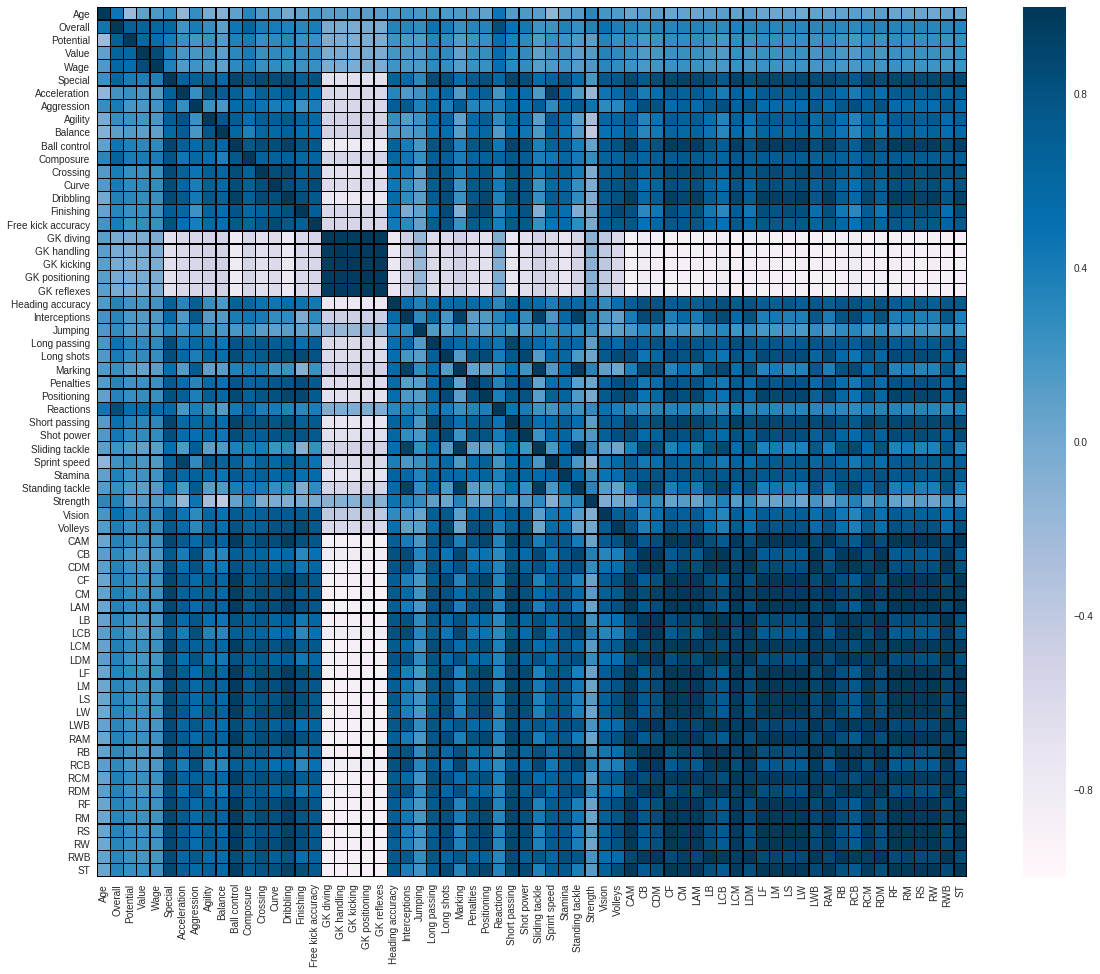

In [11]:
corr = df.corr()

fig = plt.figure(figsize=(20,16))

ax = sb.heatmap(corr, 
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 linewidths=0.25,
                 vmax=1.0, 
                 square=True, 
                 cmap = 'PuBu', 
                 linecolor='black', 
                 annot=False
                )
plt.show()


In [12]:
df['label'] = df['Club'].isin(desired_clubs).astype(int)

In [13]:
test_dansker = df[df['Nationality'] == 'Denmark'] 
del test_dansker['label']
test_dansker

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
36,C. Eriksen,25,Denmark,87,91,Tottenham Hotspur,65000000.0,165000.0,2064,77.0,...,64.0,53.0,83.0,68.0,82.0,84.0,77.0,83.0,69.0,77.0
182,K. Schmeichel,30,Denmark,83,84,Leicester City,19000000.0,65000.0,1355,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,A. Christensen,21,Denmark,81,89,Chelsea,23000000.0,86000.0,1720,70.0,...,76.0,80.0,67.0,77.0,58.0,64.0,55.0,60.0,74.0,55.0
369,S. Kjær,28,Denmark,81,82,Sevilla FC,16000000.0,23000.0,1869,60.0,...,75.0,79.0,65.0,76.0,57.0,59.0,61.0,56.0,72.0,61.0
482,D. Wass,28,Denmark,80,80,RC Celta de Vigo,14500000.0,33000.0,2107,73.0,...,74.0,68.0,79.0,74.0,78.0,79.0,75.0,77.0,76.0,75.0
570,J. Vestergaard,24,Denmark,79,84,Borussia Mönchengladbach,14500000.0,36000.0,1712,47.0,...,68.0,78.0,63.0,74.0,54.0,54.0,58.0,50.0,66.0,58.0
590,N. Jørgensen,26,Denmark,79,81,Feyenoord,15500000.0,25000.0,1931,76.0,...,56.0,51.0,71.0,57.0,78.0,76.0,78.0,76.0,59.0,78.0
669,M. Krohn-Dehli,34,Denmark,79,79,Sevilla FC,6500000.0,24000.0,2084,69.0,...,71.0,67.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,74.0
696,K. Dolberg,19,Denmark,78,88,Ajax,16500000.0,10000.0,1834,73.0,...,47.0,43.0,66.0,49.0,76.0,70.0,77.0,72.0,50.0,77.0
932,M. Braithwaite,26,Denmark,77,80,Middlesbrough,11000000.0,24000.0,1993,82.0,...,55.0,51.0,70.0,57.0,77.0,76.0,76.0,77.0,59.0,76.0


In [14]:
df_train = df.loc[df['Nationality'] != 'Denmark']

In [15]:
df_train

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,label
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89.0,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,1
1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154,92.0,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,1
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100,94.0,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,1
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291,88.0,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,1
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143,79.0,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,1
6,De Gea,26,Spain,90,92,Manchester United,64500000.0,215000.0,1458,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,2096,93.0,...,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,1
8,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,2165,60.0,...,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,1
9,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,1961,78.0,...,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,0


In [16]:
assert len(df) - len(test_dansker) == len(df_train) , 'We didn\'t get all the danes'

In [17]:
X_train = pd.concat([
    df_train.loc[df_train['label']==0].sample(170),
    df_train.loc[df_train['label']==1]
]).select_dtypes(include=['float64', 'int'])

In [18]:
y_train = X_train['label']

In [19]:
del X_train['label']
X_train

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
3005,25,73,76,4100000.0,20000.0,1934,81.0,73.0,72.0,82.0,...,72.0,70.0,69.0,70.0,68.0,71.0,65.0,69.0,73.0,65.0
14301,20,61,71,400000.0,1000.0,1574,74.0,44.0,62.0,70.0,...,53.0,47.0,60.0,54.0,58.0,59.0,54.0,58.0,55.0,54.0
12884,19,62,76,525000.0,2000.0,1094,48.0,26.0,35.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,30,79,79,8000000.0,80000.0,1246,46.0,38.0,53.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13844,22,61,65,270000.0,1000.0,1618,71.0,66.0,68.0,85.0,...,60.0,59.0,53.0,58.0,53.0,55.0,52.0,54.0,60.0,52.0
1336,31,76,76,6500000.0,34000.0,2024,54.0,83.0,48.0,41.0,...,74.0,79.0,75.0,78.0,72.0,71.0,75.0,69.0,74.0,75.0
11271,23,64,69,600000.0,3000.0,1569,74.0,42.0,74.0,76.0,...,47.0,40.0,57.0,46.0,62.0,63.0,59.0,63.0,50.0,59.0
15992,18,58,70,180000.0,1000.0,1478,67.0,65.0,64.0,62.0,...,57.0,56.0,50.0,54.0,51.0,55.0,49.0,53.0,57.0,49.0
11813,25,64,65,450000.0,2000.0,1382,56.0,65.0,48.0,52.0,...,57.0,63.0,47.0,59.0,39.0,42.0,41.0,38.0,54.0,41.0
12226,30,63,63,270000.0,2000.0,1716,71.0,66.0,70.0,60.0,...,62.0,62.0,57.0,60.0,55.0,58.0,56.0,56.0,62.0,56.0


In [20]:
#y_train

# Logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/home/sidsel/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
classifier = LogisticRegression()

In [23]:
model = classifier.fit(X_train, y_train)

In [24]:
model.score(X_train, y_train)

0.87352941176470589

Altså er har vores model ret i {{'{:.0f}'.format(100*model.score(X_train, y_train))}}% af tiden i træningssættet.

In [25]:
dansk_pred = classifier.predict(test_dansker.select_dtypes(include=['float64', 'int']))

In [26]:
dansk_probs = classifier.predict_proba(test_dansker.select_dtypes(include=['float64', 'int']))

In [27]:
test_dansker['Sandsynligheder [0,1]'] = dansk_probs.tolist()

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
test_dansker['Prediction'] = pd.Series(dansk_pred, index=test_dansker.index)

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
test_dansker[['Name', 'Club', 'Sandsynligheder [0,1]', 'Prediction']].sort('Prediction', ascending=False)

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,Name,Club,"Sandsynligheder [0,1]",Prediction
36,C. Eriksen,Tottenham Hotspur,"[0.009591652823897623, 0.9904083471761024]",1
5321,A. Lindegaard,Burnley,"[0.4355538100513202, 0.5644461899486798]",1
3225,A. Bjelland,Brentford,"[0.40105989143556753, 0.5989401085644325]",1
1938,M. Jørgensen,Huddersfield Town,"[0.44656832856290873, 0.5534316714370913]",1
1847,P. Højbjerg,Southampton,"[0.3569297564636513, 0.6430702435363487]",1
1480,Y. Poulsen,RB Leipzig,"[0.2667175292959518, 0.7332824707040482]",1
2795,E. Sviatchenko,Celtic,"[0.3892482808686709, 0.6107517191313291]",1
182,K. Schmeichel,Leicester City,"[0.16013531162930228, 0.8398646883706977]",1
309,A. Christensen,Chelsea,"[0.08571664344490437, 0.9142833565550956]",1
14507,M. Fossum Basse,FC Helsingør,"[0.8762794754145461, 0.12372052458545393]",0


Der er altså 9/346 danske spillere som kan spille (eller allerede spiller) for de store klubber

In [185]:
test_dansker['Sandsynligheder [0,1]'].map(lambda x: x[1]).sort_values(ascending=False).tolist()

[0.9904083471761024,
 0.9142833565550956,
 0.8398646883706977,
 0.7332824707040482,
 0.6430702435363487,
 0.6107517191313291,
 0.5989401085644325,
 0.5644461899486798,
 0.5534316714370913,
 0.44842986504241555,
 0.4417474076124357,
 0.4317908431110145,
 0.39989436955039465,
 0.3885891587200105,
 0.37702412085781406,
 0.36593060698782487,
 0.3534625501210198,
 0.34679013637903044,
 0.32534028544039423,
 0.32025676841035833,
 0.3189148843623424,
 0.3185055375768017,
 0.30914000610112297,
 0.29428688447733586,
 0.2894405590948867,
 0.28645949486912486,
 0.2845778318354085,
 0.28269503206527513,
 0.2804133667412484,
 0.27860077226287056,
 0.27337233871504374,
 0.2688152643463301,
 0.2636577103821488,
 0.2618377357854492,
 0.2615903195458761,
 0.26108679414440583,
 0.2601041909975557,
 0.2588653935876331,
 0.2578527807182061,
 0.2554359842654922,
 0.254631374271695,
 0.2544302591078829,
 0.24959091573238207,
 0.24887792679457268,
 0.24860917650341896,
 0.2485168758353217,
 0.248466979303816

# Logistic Regression Model 2.0

Hvis vi bare vil træne en model til at blive godt til at 

In [112]:
new_desired_clubs = ['Icons', 'Juventus', 'FC Barcelona', 
                 'Manchester City', 'Borussia Dortmund',
                 'Chelsea', 'Manchester United',
                 'FC Bayern Munich', 'Arsenal',
                 'Tottenham Hotspur', 'Real Madrid CF', 
                 'Liverpool', 'Paris Saint-Germain', ]

In [113]:
df['new_label'] = df['Club'].isin(new_desired_clubs).astype(int)

In [114]:
Xall = df.sample(frac=0.6)
Zall = df[~df.isin(Xall)].dropna()
X = Xall.select_dtypes(include=['float64', 'int'])
y = X.iloc[:,-1]
del X['new_label']
Z = Zall.select_dtypes(include=['float64', 'int'])
Zy = Z.iloc[:,-1]
del Z['new_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Vi har nu splittet alt vores data random i trænings- og testsæt, og tjekker at vi ikke har mistet noget data undervejs:

In [115]:
assert len(Xall)+len(Zall) == len(df) , 'Not whole dataset'
assert Xall.new_label.value_counts()[1]+Zall.new_label.value_counts()[1] == df.new_label.value_counts()[1], 'Some values are missing'

In [116]:
classifier = LogisticRegression(random_state=0)
new_model = classifier.fit(X_train, y_train)

### Forudsige testsæt resultatet og lave confusion matrix
For at sige noget om vores nye model, laver vi en "confusion_matrix"

<img src='http://revolution-computing.typepad.com/.a/6a010534b1db25970b01bb08c97955970d-pi',
    align="center"
    width="40%"
    alt="confusion matrix">
    
T og F står for henholdsvist True og False<br>
P og N står for henholdsvist Positive og Negative

In [117]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2633   13]
 [  22   30]]


Resultatet fortæller os, at vi har {{confusion_matrix[0,0]}}+{{confusion_matrix[1,1]}} = 
{{confusion_matrix[0,0]+confusion_matrix[1,1]}} korrekte forudsigelser og {{confusion_matrix[0,1]}}+{{confusion_matrix[1,0]}} = {{confusion_matrix[0,1]+confusion_matrix[1,0]}} ukorrekte

In [118]:
print(new_model.score(X_train, y_train))
print(new_model.score(X_test, y_test))

0.987022617723
0.987027427724


Så nøjagtigheden af vores logistiske regressions classifier på testsættet er  {{'{:.0f}'.format(classifier.score(X_test, y_test)*100)}}%

In [119]:
# predict class labels for the test set
predicted = new_model.predict(X_test)
print(predicted)

[0 0 0 ..., 0 0 0]


In [120]:
# generate class probabilities
probs = new_model.predict_proba(X_test)
print(probs)

[[ 0.99827171  0.00172829]
 [ 0.99276297  0.00723703]
 [ 0.99565031  0.00434969]
 ..., 
 [ 0.99419575  0.00580425]
 [ 0.99581051  0.00418949]
 [ 0.9961199   0.0038801 ]]


In [121]:
from sklearn import metrics

# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.987027427724
0.928818535961


In [122]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2646
          1       0.70      0.58      0.63        52

avg / total       0.99      0.99      0.99      2698



In [123]:
rest = new_model.predict(Z)
rest

array([1, 1, 1, ..., 0, 0, 0])

In [124]:
rest2 = new_model.predict_proba(X_test)
print(rest2)

[[ 0.99827171  0.00172829]
 [ 0.99276297  0.00723703]
 [ 0.99565031  0.00434969]
 ..., 
 [ 0.99419575  0.00580425]
 [ 0.99581051  0.00418949]
 [ 0.9961199   0.0038801 ]]


In [125]:
print(metrics.accuracy_score(Zy, rest))
print(metrics.roc_auc_score(Zy, rest2[:, 1]))

0.986651835373


ValueError: Found input variables with inconsistent numbers of samples: [7192, 2698]

In [126]:
from sklearn.cross_validation import cross_val_score

In [127]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-127-4a10affe67c7>, line 3)

In [ ]:
model.predict_proba(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]))

### look at this

In [184]:
test_dansker['Sandsynligheder [0,1]'].map(lambda x: x[1]).sort_values(ascending=False).tolist()

[0.9904083471761024,
 0.9142833565550956,
 0.8398646883706977,
 0.7332824707040482,
 0.6430702435363487,
 0.6107517191313291,
 0.5989401085644325,
 0.5644461899486798,
 0.5534316714370913,
 0.44842986504241555,
 0.4417474076124357,
 0.4317908431110145,
 0.39989436955039465,
 0.3885891587200105,
 0.37702412085781406,
 0.36593060698782487,
 0.3534625501210198,
 0.34679013637903044,
 0.32534028544039423,
 0.32025676841035833,
 0.3189148843623424,
 0.3185055375768017,
 0.30914000610112297,
 0.29428688447733586,
 0.2894405590948867,
 0.28645949486912486,
 0.2845778318354085,
 0.28269503206527513,
 0.2804133667412484,
 0.27860077226287056,
 0.27337233871504374,
 0.2688152643463301,
 0.2636577103821488,
 0.2618377357854492,
 0.2615903195458761,
 0.26108679414440583,
 0.2601041909975557,
 0.2588653935876331,
 0.2578527807182061,
 0.2554359842654922,
 0.254631374271695,
 0.2544302591078829,
 0.24959091573238207,
 0.24887792679457268,
 0.24860917650341896,
 0.2485168758353217,
 0.248466979303816